In [104]:
import sklearn
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import re

In [199]:
def Parse_Default(tweet):
    stocks = pd.read_csv('../data/hourly_stocks.csv')
    tweets = pd.read_csv(tweet)
    j = 0
    total = np.zeros(3)
    vals = 0
    avg_sent = []
    i = 0
    print(stocks.iloc[len(stocks) - 1][0])
    while True:
        tweet_dt = tweets.columns[i]
        if tweet_dt >= stocks.iloc[len(stocks) - 1][0]:
            if vals != 0:
                avg_sent.append(total / vals)
                total = np.zeros(3)
                vals = 0
            else:
                avg_sent.append(np.zeros(3))
    #             print('final append')
            break
        stocks_dt = stocks.iloc[j][0]
        if tweet_dt >= stocks_dt:
            j += 1
    #             print('stock', stocks_dt, 'appended', vals)
            if vals != 0:
                avg_sent.append(total / vals)
                total = np.zeros(3)
                vals = 0
            else:
                avg_sent.append(np.zeros(3))
        else:
    #             print('tweet', tweet_dt, 'added')
#             print(tweets.iloc[0, i])
            total += np.array(re.sub("\s+", ",", tweets.iloc[0, i].strip()).strip("[]").split(',')).astype(np.float)
            vals += 1
            i += 1
#     print(len(avg_sent))
    return avg_sent

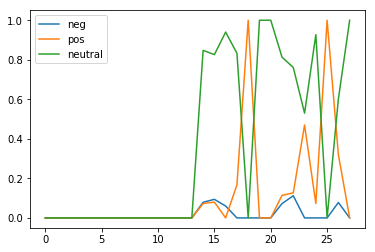

In [200]:
plt.plot(avg_sent)
plt.legend(['neg', 'pos', 'neutral'])
plt.show()

In [3]:
class Logistic_Regression:
    from sklearn.linear_model import LogisticRegression
    def __init__(stock_data, tweet_data, parse_function=Parse_Default, penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None):
        self.data = parse_function(data)
        self.model = LogisticRegression(penalty, dual, tol, C, fit_intercept, intercept_scaling, class_weight, random_state, solver, max_iter, multi_class, verbose, warm_start, n_jobs).fit(data.xtrain, data.ytrain)
    pass

class Ridge_Regression:
    from sklearn.linear_model import RidgeCV
    def __init__(stock_data, tweet_data, parse_function=Parse_Default, alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False):
        self.data = parse_function(data)
        self.model = RidgeCV(alphas, fit_intercept, normalize, scoring, cv, gcv_mode, store_cv_values).fit(data.xtrain, data.ytrain)
    pass

class Linear_Regression:
    from sklearn.linear_model import LinearRegression
    def __init__(stock_data, tweet_data, parse_function=Parse_Default,fit_intercept=True, normalize=False, copy_X=True, n_jobs=None):
        self.data = parse_function(data)
        self.model = LinearRegression(fit_intercept, normalize, copy_X, n_jobs).fit(model.xtrain, model.ytrain)
    pass



In [148]:
df = pd.read_csv('../data/hourly_stocks.csv')
names = []
prices = []
dates = []
for i in range(1, len(df.columns)):
    names.append(df.columns[i][:-5].upper())
    opening = np.array(df.iloc[:,[i]])
    prices.append(opening)

GOOGLE


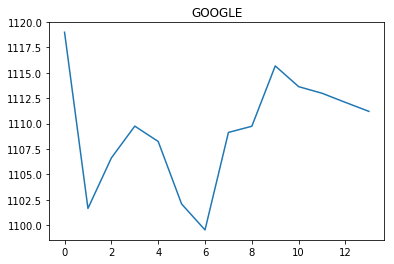

2019-02-22 15:30:00


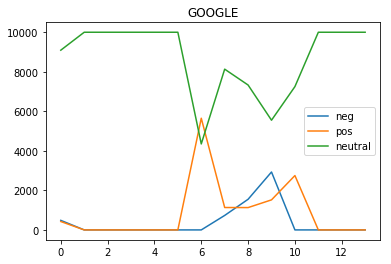

APPLE
AMAZON
CAPITAL_ONE


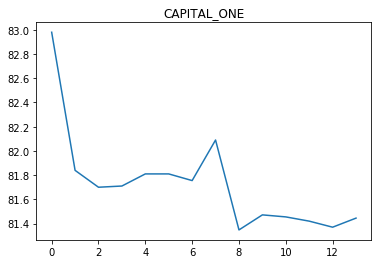

2019-02-22 15:30:00


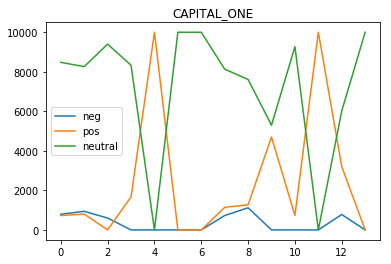

NVIDIA


In [201]:
csvs = ['../data/google.csv', '../data/amazon.csv', '../data/apple.csv', '../data/capital_one.csv', '../data/nvidia.csv']
for price,name,csv in zip(prices,names,csvs):
    print(name)
    if name.lower() == 'amazon' or name.lower() == 'apple' or name.lower() == 'nvidia':
        continue
    plt.plot(price[14:])
    plt.title(name)
    plt.show()
    avg_sent = Parse_Default(csv)
    plt.plot(np.array(avg_sent[14:])*10000)
    plt.title(name)
    plt.legend(['neg', 'pos', 'neutral'])
    plt.show()
plt.show()

In [74]:
a = np.array([[1],[3],[5],[7]])
b = np.array([[2],[4],[6],[8]])
np.insert(b,np.arange(len(a)),a, axis=0)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])